In [1]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5fe53b184f367847aa55a2617e1b05248cac098b2c3dd14dae217169b3ce2e42b10bcc2af6d9b6787a4792a557f9705bb1eba86d761f2407d2'

In [2]:
import aocd
from aocd.models import Puzzle
day = 9
year = 2022
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [5]:
test_data = """R 4
U 4
L 3
D 1
R 4
D 1
L 5
R 2"""

In [56]:
test_dataB = """R 5
U 8
L 8
D 3
R 17
D 10
L 25
U 20"""

In [59]:
data = puzzle.input_data.splitlines()
# data = test_data.splitlines()
# data = test_dataB.splitlines()
len(data), data[:10]

(2000, ['R 1', 'D 1', 'L 2', 'R 1', 'U 2', 'R 2', 'L 1', 'R 2', 'L 2', 'D 1'])

In [26]:
import math
def parse(inp):
    mapping = {
        'R': 1+0j,
        'L': -1+0j,
        'U': 0+1j,
        'D': 0-1j,
    }
    direction, steps = inp.split(' ')    
    return mapping[direction], int(steps)

def follow(H, T):
    delta = H - T
    if abs(delta) < 1.5:
        return 0
    move = 0
    if (delta.real != 0):
        move += delta.real / abs(delta.real)
    if (delta.imag != 0):
        move += (delta.imag / abs(delta.imag)) * 1j
    return move

def walk(moves):
    H = 0
    T = 0
    visited = set()
    for dtn, steps in moves:
        for i in range(steps):
            H += dtn
            T += follow(H, T)
            visited.add(T)
    return H, T, len(visited)

In [28]:
moves = [parse(line) for line in data]
H, T, nvisited = walk(moves)
H, T, nvisited

((177+192j), (176+192j), 6209)

In [29]:
puzzle.answer_a = nvisited

That's the right answer!  You are one gold star closer to collecting enough star fruit. [Continue to Part Two]


# Part 2

In [52]:
def walkB(moves):
    knots = [0] * 10
    visited = set()
    for dtn, steps in moves:        
        for i in range(steps):
            # print(dtn, i)
            knots[0] += dtn
            for j in range(1, len(knots)):
                x = follow(knots[j-1], knots[j])
                # print(x)
                knots[j] += x
            visited.add(knots[-1])
    return knots, len(visited)

In [60]:
moves = [parse(line) for line in data]
knots, nvisited = walkB(moves)
knots, nvisited

([(177+192j),
  (176+192j),
  (175+192j),
  (174+192j),
  (173+192j),
  (172+192j),
  (171+192j),
  (170+192j),
  (169+192j),
  (168+192j)],
 2460)

In [61]:
puzzle.answer_b = nvisited

That's the right answer!  You are one gold star closer to collecting enough star fruit.You have completed Day 9! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


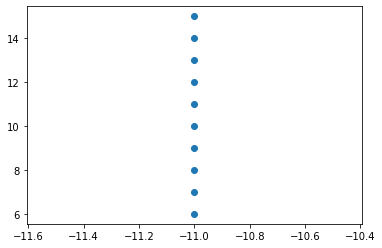

In [66]:
import matplotlib.pyplot as plt
moves = [parse(line) for line in test_dataB.splitlines()]

knots, nvisited = walkB(moves)

x = [knot.real for knot in knots]
y = [knot.imag for knot in knots]
plt.plot(x, y, 'o')


In [67]:
knots

[(-11+15j),
 (-11+14j),
 (-11+13j),
 (-11+12j),
 (-11+11j),
 (-11+10j),
 (-11+9j),
 (-11+8j),
 (-11+7j),
 (-11+6j)]